/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:10: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")


                          Unnamed: 0  i_NUMBER   i_START     i_END    i_TIME  \
Unnamed: 0                  1.000000  0.176671  0.979528  0.979537  0.046763   
i_NUMBER                    0.176671  1.000000  0.014222  0.014256 -0.043395   
i_START                     0.979528  0.014222  1.000000  0.999999  0.053527   
i_END                       0.979537  0.014256  0.999999  1.000000  0.054215   
i_TIME                      0.046763 -0.043395  0.053527  0.054215  1.000000   
...                              ...       ...       ...       ...       ...   
migration_background        0.065649 -0.019615  0.070995  0.070991  0.005700   
town_name                   0.011358 -0.030279  0.017819  0.017838  0.000144   
population_total           -0.000717 -0.011488  0.001719  0.001720 -0.002706   
population_density_level    0.015641  0.001809  0.015395  0.015402  0.005908   
all_persons                      NaN       NaN       NaN       NaN       NaN   

                          unique_id  wa

<Axes: >

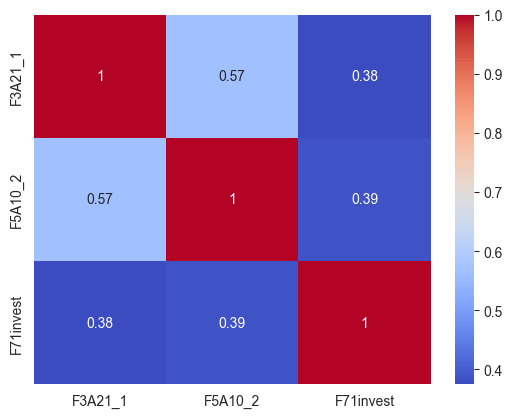

In [7]:
from tools.preprocessing_data import encode_data_to_numeric
import seaborn as sns

# Load data
data = encode_data_to_numeric()
correlation_matrix = data.corr()

# Filter the correlation matrix
filtered_columns = correlation_matrix.columns[correlation_matrix.loc['F3A21_1'].abs() > 0.25]
filtered_correlation_matrix = correlation_matrix.loc[filtered_columns, filtered_columns]

# Plot the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

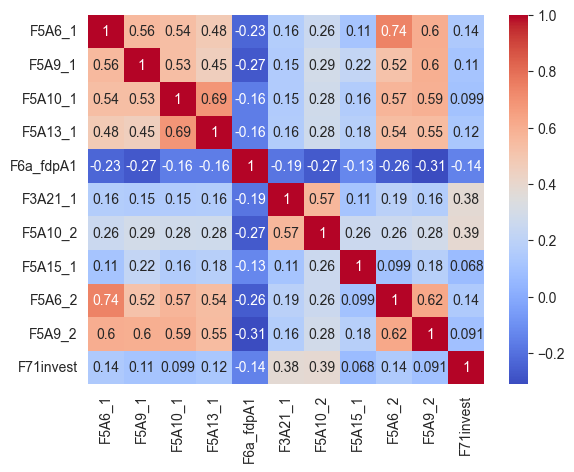

In [8]:
# Filter the correlation matrix
filtered_columns = correlation_matrix.columns[correlation_matrix.loc['F5A10_2'].abs() > 0.25]
filtered_correlation_matrix = correlation_matrix.loc[filtered_columns, filtered_columns]

# Plot the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

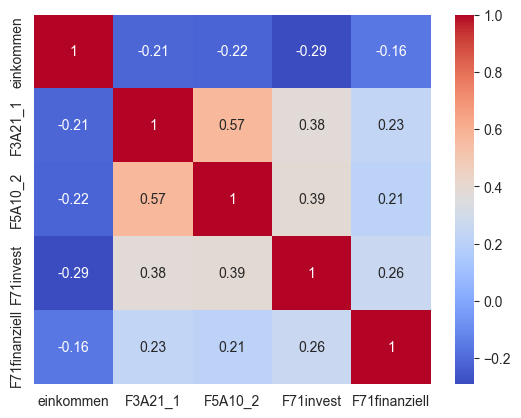

In [9]:
# Filter the correlation matrix
filtered_columns = correlation_matrix.columns[correlation_matrix.loc['F71invest'].abs() > 0.25]
filtered_correlation_matrix = correlation_matrix.loc[filtered_columns, filtered_columns]

# Plot the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')